### WEEK-3 

### 200968108

### **Convolutional Neural Networks**

## **MNIST dataset**

The MNIST data set contains 70,000 images of handwritten digits and their corresponding labels. The images are 28x28 with pixel values from 0 to 255. The labels are the digits from 0 to 9. By default 60,000 of these images belong to a training set and 10,000 of these images belong to a test set.

## **The CIFAR-10 dataset**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

It contains the following 10 classes: 

*   Airplane
*   automobile
*   bird
*   cat
*   deer
*   frog
*   horse
*   ship
*   truck
*   dog

Importing required libraries!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import metrics

In [ ]:
#checking the version of the package/module.
print(f"Tensorflow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

Tensorflow version: 2.8.2
Keras version: 2.8.0


### **Q) Train, Test and plot the performance curves for the following architectures over the MNIST dataset as well as the CIFAR-10 dataset.**

Importing datasets!

In [ ]:
#importing the mnist dataset
mnist = tf.keras.datasets.mnist
(X_train_mnist,y_train_mnist),(X_test_mnist,y_test_mnist) = mnist.load_data() 

#importing the cifar-10 dataset
cifar = tf.keras.datasets.cifar10
(X_train_cifar,y_train_cifar),(X_test_cifar,y_test_cifar) = cifar.load_data()

print("Datasets are imported successfully!")

Datasets are imported successfully!


Checking the dimensions of datasets

In [ ]:
print("MNIST Dataset")
print("Training data: ", X_train_mnist.shape)
print("Test data: ",X_test_mnist.shape)
print(f"Dimensions of each image are {X_train_mnist.shape[1]} x {X_train_mnist.shape[2]} pixels.\n")

print("CIFAR-10 Dataset")
# cifar-10 dataset
print("Training data: ", X_train_cifar.shape)
print("Test data: ",X_test_cifar.shape)
print(f"Dimensions of each image are {X_train_cifar.shape[1]} x {X_train_cifar.shape[2]} pixels.")

MNIST Dataset
Training data:  (60000, 28, 28)
Test data:  (10000, 28, 28)
Dimensions of each image are 28 x 28 pixels.

CIFAR-10 Dataset
Training data:  (50000, 32, 32, 3)
Test data:  (10000, 32, 32, 3)
Dimensions of each image are 32 x 32 pixels.


Vizualizing the images(classes) in the datsets

In MNIST Dataset: 



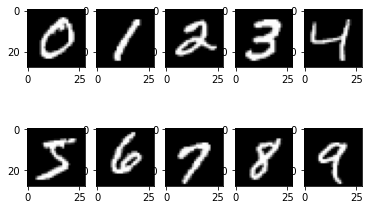

In [ ]:
# the below code returns a tuple containing an array of unique values and an array of their indexes in the y_test data into a.
print("In MNIST Dataset: \n")
(x,id) = np.unique(y_train_mnist, return_index=True)

for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train_mnist[id[i]],cmap="gray")

In CIFAR-10 Dataset: 



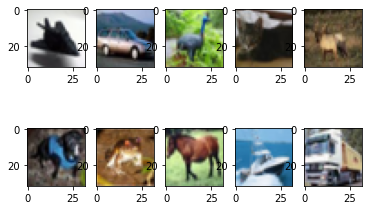

In [ ]:
print("In CIFAR-10 Dataset: \n")
(x,id) = np.unique(y_train_cifar, return_index=True)

for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train_cifar[id[i]],cmap="gray")

Performing Normalization

In [ ]:
X_train_mnist = X_train_mnist/255
X_test_mnist = X_test_mnist/255
X_train_cifar = X_train_cifar/255
X_test_cifar = X_test_cifar/255

**1. Design a CNN with:**

**a) One Convolution layer which uses 32 kernels each of size 5x5, stride = 1 and, padding =0**

**b) One Pooling layer which uses MAXPOOLING with stride =2.**

**c) One hidden layer having number of neurons = 100**

***Note: use ReLU activation function after each convolution layer.***

In [ ]:
# Building a CNN using mnist dataset
mnist_model1 = tf.keras.Sequential()
mnist_model1.add(tf.keras.Input(shape =(28,28,1)))
mnist_model1.add(tf.keras.layers.Conv2D(32,kernel_size=(5,5),activation="relu",padding="valid"))
mnist_model1.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2))
mnist_model1.add(tf.keras.layers.Flatten())
mnist_model1.add(tf.keras.layers.Dense(100, activation="relu"))
mnist_model1.add(tf.keras.layers.Dense(10, activation="softmax"))
mnist_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 100)               460900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 462,742
Trainable params: 462,742
Non-trainable params: 0
__________________________________________________

In [ ]:
# compiling and training our model
mnist_model1.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

batch_size = 32
epochs = 10

history1= mnist_model1.fit(X_train_mnist,y_train_mnist,batch_size=batch_size,epochs=epochs,validation_split=0.1)


Epoch 1/10
1688/1688 [==============================] - 18s 7ms/step - loss: 0.1465 - accuracy: 0.9560 - val_loss: 0.0517 - val_accuracy: 0.9848
Epoch 2/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0485 - accuracy: 0.9848 - val_loss: 0.0402 - val_accuracy: 0.9875
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0332 - accuracy: 0.9890 - val_loss: 0.0435 - val_accuracy: 0.9878
Epoch 4/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0224 - accuracy: 0.9930 - val_loss: 0.0423 - val_accuracy: 0.9883
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0153 - accuracy: 0.9954 - val_loss: 0.0452 - val_accuracy: 0.9883
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0135 - accuracy: 0.9957 - val_loss: 0.0424 - val_accuracy: 0.9878
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0097 - accuracy: 0.9966 - val_loss: 0.0512 - val_accuracy

In [42]:
#evaluating the model
print(f"Accuracy: {mnist_model1.evaluate(X_test_mnist,y_test_mnist)[1]}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0487 - accuracy: 0.9889
Accuracy: 0.9889000058174133


In [ ]:
def plot(history):
  sns.set_style("darkgrid")
  #get the details form the history object
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  #Train and validation accuracy
  plt.plot(epochs, acc, 'b', label='Training accurarcy')
  plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
  plt.xlabel('Epoch #')
  plt.ylabel('accuracy')
  plt.title('Training and Validation accurarcy')
  plt.legend()


  plt.figure()
  #Train and validation loss
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('Epoch #')
  plt.ylabel('loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()

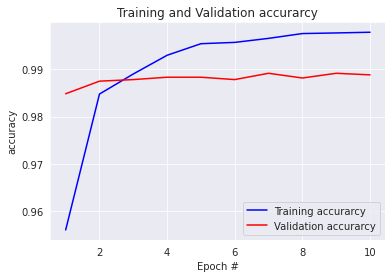

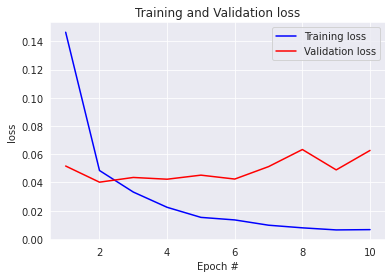

In [ ]:
plot(history1)

In [ ]:
# Building a CNN using cifar-10 dataset
cifar_model1 = tf.keras.Sequential()
cifar_model1.add(tf.keras.Input(shape =(32,32,3)))
cifar_model1.add(tf.keras.layers.Conv2D(32,kernel_size=(5,5),activation="relu",padding="valid"))
cifar_model1.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2))
cifar_model1.add(tf.keras.layers.Dropout(0.5))
cifar_model1.add(tf.keras.layers.Flatten())
cifar_model1.add(tf.keras.layers.Dense(100, activation="relu"))
cifar_model1.add(tf.keras.layers.Dropout(0.5))
cifar_model1.add(tf.keras.layers.Dense(10, activation="softmax"))
cifar_model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               627300    
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                      

In [ ]:
# compiling and training our model
cifar_model1.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

batch_size = 32
epochs = 20

history2= cifar_model1.fit(X_train_cifar,y_train_cifar,batch_size=batch_size,epochs=epochs,validation_split=0.1)


Epoch 1/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.7322 - accuracy: 0.3694 - val_loss: 1.4167 - val_accuracy: 0.5014
Epoch 2/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.4969 - accuracy: 0.4629 - val_loss: 1.2915 - val_accuracy: 0.5468
Epoch 3/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4189 - accuracy: 0.4916 - val_loss: 1.2251 - val_accuracy: 0.5736
Epoch 4/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.3586 - accuracy: 0.5172 - val_loss: 1.1761 - val_accuracy: 0.6008
Epoch 5/20
1407/1407 [==============================] - 6s 4ms/step - loss: 1.3177 - accuracy: 0.5327 - val_loss: 1.1316 - val_accuracy: 0.6120
Epoch 6/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2850 - accuracy: 0.5417 - val_loss: 1.1280 - val_accuracy: 0.6144
Epoch 7/20
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2515 - accuracy: 0.5537 - val_loss: 1.1151 - val_accuracy:

In [43]:
#evaluating the model
print(f"Accuracy: {cifar_model1.evaluate(X_test_cifar,y_test_cifar)[1]}")

313/313 [==============================] - 1s 3ms/step - loss: 1.0119 - accuracy: 0.6488
Accuracy: 0.6488000154495239


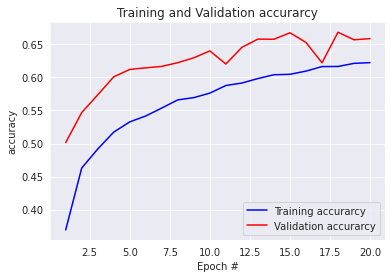

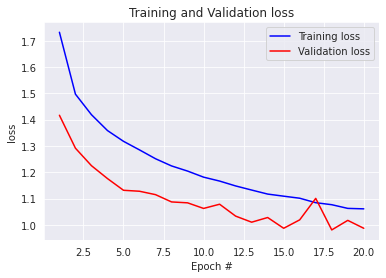

In [ ]:
plot(history2)

**2. Design a CNN with:**

**a) Two back-to-back Convolution layers which uses 32 kernels each of size 3x3, stride = 1 and, 
padding =0**

**b) One Pooling layer which uses MAXPOOLING with stride =2.**

**c) One hidden layer having number of neurons = 100**

**Note: use ReLU activation function after each convolution layer.**


In [ ]:
# Building a CNN using mnist dataset
mnist_model2 = tf.keras.Sequential()
mnist_model2.add(tf.keras.Input(shape =(28,28,1)))
mnist_model2.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu",padding="valid"))
mnist_model2.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu",padding="valid"))
mnist_model2.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2))
mnist_model2.add(tf.keras.layers.Flatten())
mnist_model2.add(tf.keras.layers.Dense(100, activation="relu"))
mnist_model2.add(tf.keras.layers.Dense(10, activation="softmax"))
mnist_model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               460900    
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                      

In [ ]:
# compiling and training our model
mnist_model2.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

batch_size = 32
epochs = 20

history3= mnist_model2.fit(X_train_mnist,y_train_mnist,batch_size=batch_size,epochs=epochs,validation_split=0.1)


Epoch 1/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1387 - accuracy: 0.9577 - val_loss: 0.0519 - val_accuracy: 0.9845
Epoch 2/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0437 - accuracy: 0.9861 - val_loss: 0.0397 - val_accuracy: 0.9885
Epoch 3/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0283 - accuracy: 0.9908 - val_loss: 0.0412 - val_accuracy: 0.9897
Epoch 4/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0189 - accuracy: 0.9937 - val_loss: 0.0478 - val_accuracy: 0.9885
Epoch 5/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0145 - accuracy: 0.9952 - val_loss: 0.0401 - val_accuracy: 0.9918
Epoch 6/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0111 - accuracy: 0.9963 - val_loss: 0.0479 - val_accuracy: 0.9902
Epoch 7/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0102 - accuracy: 0.9965 - val_loss: 0.0449 - val_accuracy:

In [47]:
#evaluating the model
acc = mnist_model2.evaluate(X_test_mnist,y_test_mnist)
print(f"Accuracy: {acc[1]}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0637 - accuracy: 0.9903
Accuracy: 0.9902999997138977


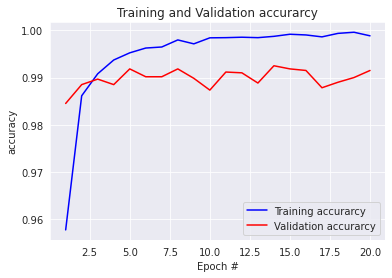

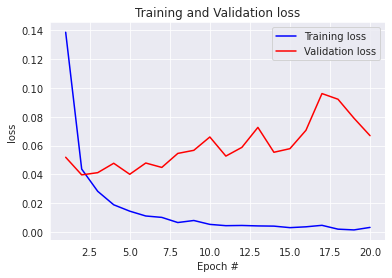

In [ ]:
plot(history3)

In [ ]:
# Building a CNN using cifar-10 dataset
cifar_model2 = tf.keras.Sequential()
cifar_model2.add(tf.keras.Input(shape =(32,32,3)))
cifar_model2.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu",padding="valid"))
cifar_model2.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
cifar_model2.add(tf.keras.layers.Dropout(0.5))
cifar_model2.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu",padding="valid"))
cifar_model2.add(tf.keras.layers.Dropout(0.5))
cifar_model2.add(tf.keras.layers.Flatten())
cifar_model2.add(tf.keras.layers.Dense(100, activation="relu"))
cifar_model2.add(tf.keras.layers.Dropout(0.5))
cifar_model2.add(tf.keras.layers.Dense(10, activation="softmax"))
cifar_model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                      

In [ ]:
# compiling and training our model
cifar_model2.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

epochs = 30

history4= cifar_model2.fit(X_train_cifar,y_train_cifar,epochs=epochs,validation_split=0.1)


Epoch 1/30
1407/1407 [==============================] - 6s 4ms/step - loss: 1.7251 - accuracy: 0.3646 - val_loss: 1.3620 - val_accuracy: 0.5232
Epoch 2/30
1407/1407 [==============================] - 5s 4ms/step - loss: 1.4436 - accuracy: 0.4785 - val_loss: 1.2042 - val_accuracy: 0.5758
Epoch 3/30
1407/1407 [==============================] - 6s 4ms/step - loss: 1.3540 - accuracy: 0.5146 - val_loss: 1.1401 - val_accuracy: 0.5968
Epoch 4/30
1407/1407 [==============================] - 6s 4ms/step - loss: 1.3022 - accuracy: 0.5349 - val_loss: 1.0654 - val_accuracy: 0.6260
Epoch 5/30
1407/1407 [==============================] - 6s 4ms/step - loss: 1.2670 - accuracy: 0.5479 - val_loss: 1.0541 - val_accuracy: 0.6286
Epoch 6/30
1407/1407 [==============================] - 6s 4ms/step - loss: 1.2258 - accuracy: 0.5652 - val_loss: 1.0127 - val_accuracy: 0.6562
Epoch 7/30
1407/1407 [==============================] - 6s 4ms/step - loss: 1.2064 - accuracy: 0.5722 - val_loss: 0.9887 - val_accuracy:

In [46]:
#evaluating the model
acc=cifar_model2.evaluate(X_test_cifar,y_test_cifar)
print(f"Accuracy: {acc[1]}")

313/313 [==============================] - 1s 3ms/step - loss: 0.8754 - accuracy: 0.6948
Accuracy: 0.6948000192642212


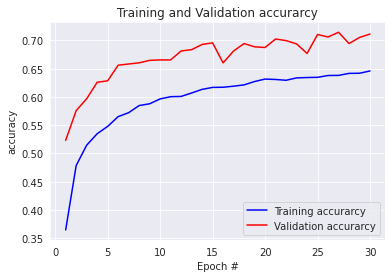

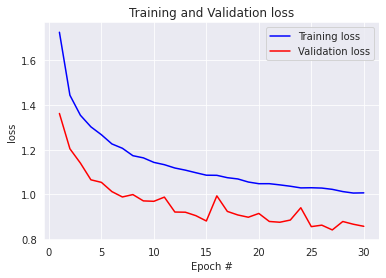

In [ ]:
plot(history4)

**3. Design the LeNet-5 architecture (see fig below)**
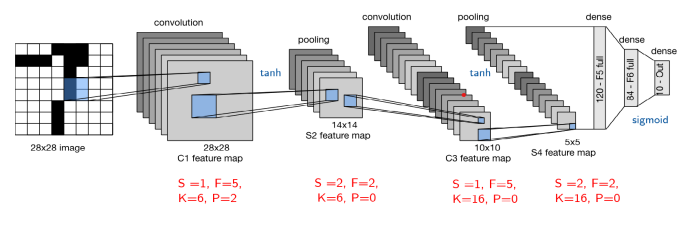

In [ ]:
# Building the above CNN for mnist dataset
mnist_model3 = tf.keras.Sequential()
mnist_model3.add(tf.keras.Input(shape =(28,28,1)))
mnist_model3.add(tf.keras.layers.Conv2D(6,kernel_size=(5,5),activation="tanh",padding="same"))
mnist_model3.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2))
mnist_model3.add(tf.keras.layers.Conv2D(16,kernel_size=(5,5),activation="tanh"))
mnist_model3.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2))
mnist_model3.add(tf.keras.layers.Flatten())
mnist_model3.add(tf.keras.layers.Dense(120, activation="relu"))
mnist_model3.add(tf.keras.layers.Dense(84, activation="sigmoid"))
mnist_model3.add(tf.keras.layers.Dense(10, activation="softmax"))
mnist_model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 400)               0         
                                                                 
 dense_8 (Dense)             (None, 120)              

In [ ]:
# compiling and training our model
mnist_model3.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

batch_size = 32
epochs = 10

history5= mnist_model3.fit(X_train_mnist,y_train_mnist,batch_size=batch_size,epochs=epochs,validation_split=0.1)


Epoch 1/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2340 - accuracy: 0.9346 - val_loss: 0.0658 - val_accuracy: 0.9800
Epoch 2/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0649 - accuracy: 0.9801 - val_loss: 0.0515 - val_accuracy: 0.9838
Epoch 3/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0463 - accuracy: 0.9856 - val_loss: 0.0541 - val_accuracy: 0.9832
Epoch 4/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0361 - accuracy: 0.9886 - val_loss: 0.0406 - val_accuracy: 0.9878
Epoch 5/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0288 - accuracy: 0.9911 - val_loss: 0.0496 - val_accuracy: 0.9855
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0227 - accuracy: 0.9927 - val_loss: 0.0457 - val_accuracy: 0.9872
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0185 - accuracy: 0.9941 - val_loss: 0.0500 - val_accuracy:

In [45]:
#evaluating the model
acc=mnist_model3.evaluate(X_test_mnist,y_test_mnist)
print(f"Accuracy: {acc[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0437 - accuracy: 0.9880
Accuracy: 0.9879999756813049


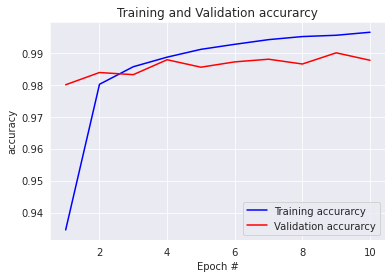

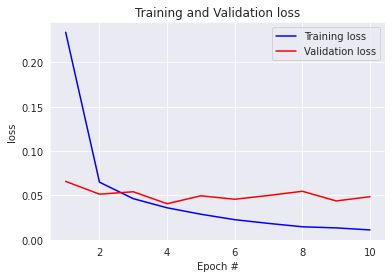

In [ ]:
plot(history5)

In [ ]:
# Building above CNN for cifar-10 dataset
cifar_model3 = tf.keras.Sequential()
cifar_model3.add(tf.keras.Input(shape =(32,32,3)))
cifar_model3.add(tf.keras.layers.Conv2D(6,kernel_size=(5,5),activation="tanh",padding="same"))
cifar_model3.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2))
cifar_model3.add(tf.keras.layers.Dropout(0.5))
cifar_model3.add(tf.keras.layers.Conv2D(16,kernel_size=(5,5),activation="tanh"))
cifar_model3.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = 2))
cifar_model3.add(tf.keras.layers.Flatten())
cifar_model3.add(tf.keras.layers.Dense(120, activation="relu"))
cifar_model3.add(tf.keras.layers.Dense(84, activation="sigmoid"))
cifar_model3.add(tf.keras.layers.Dense(10, activation="softmax"))
cifar_model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 6)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 16, 16, 6)         0         
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 16)        2416      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 16)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 576)              

In [ ]:
# compiling and training our model
cifar_model3.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

epochs = 35

history6= cifar_model3.fit(X_train_cifar,y_train_cifar,epochs=epochs,validation_split=0.1)


In [44]:
#evaluating the model
acc = cifar_model3.evaluate(X_test_cifar,y_test_cifar)
print(f"Accuracy: {acc[1]}")

313/313 [==============================] - 1s 3ms/step - loss: 1.1795 - accuracy: 0.5925
Accuracy: 0.5924999713897705


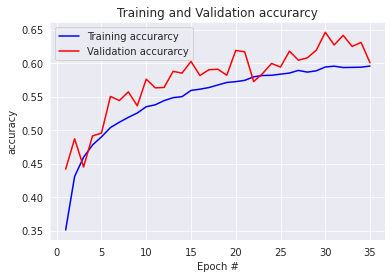

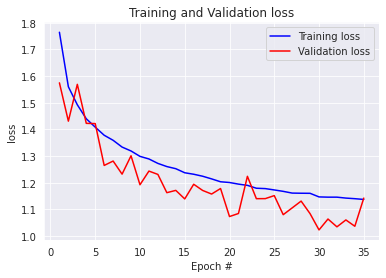

In [ ]:
plot(history6)

**4. Compare the performances of the above three architectures with respect to the two datasets.**



*   For the MNIST Dataset, all the above 3 CNN designs work well with almost 98% accuracy.
*   For the CIFAR-10 Dataset, 2nd CNN design is performing better compared to the remaining two models. But all the 3 designs perform with an accuracy less than 70%.

However, performance of the above CNN's especially in case of the CIFAR-10 dataset can be further improved by changing the hyperparameters and by adding additional convolutional, pooling and dropout layers wherever required which can help our models achieve better performance leading to an acuracy of around 80-85%.


